In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load csv data
# read expenses.csv file
df = pd.read_csv('expenses.csv', parse_dates=['Date'])
# display first few records
df.head()

,Date,Category,Amount,Description
0,2025-10-06,Food,150,Pizza at Dominos
1,2025-11-06,Transport,50,Rickshaw fare
2,2025-12-06,Rent,5000,June rent
3,2025-12-06,Utilities,200,Electricity Bill


In [6]:
# Total Spending Overview
total_spent = df['Amount'].sum() # Calculating total spent across all expenses
highest_expense = df.loc[df['Amount'].idxmax()] # Find the row with the highest expense by locating the index of the max value
lowest_expense = df.loc[df['Amount'].idxmin()] # Find the row with the lowest expense by locating the index of the min value

In [7]:
# Print the total spent and the details of highest and lowest expenses
print(f"Total spent overall: {total_spent}")
print("\nHighest expense:")
print(highest_expense)
print("\nLowest expense:")
print(lowest_expense)

Total spent overall: 5400

Highest expense:
Date           2025-12-06 00:00:00
Category                      Rent
Amount                        5000
Description              June rent
Name: 2, dtype: object

Lowest expense:
Date           2025-11-06 00:00:00
Category                 Transport
Amount                          50
Description          Rickshaw fare
Name: 1, dtype: object


In [8]:
# Category wise analysis
# grouping data by 'Category' to analyze spending per category
category_group = df.groupby('Category').agg(
    total_amount=('Amount', 'sum'),          # Total money spent per category
    transaction_count=('Amount', 'count')    # Number of transactions per category
)
# Calculate what percentage of the total spending each category accounts for
category_group['percentage_of_total'] = (
    category_group['total_amount'] / total_spent * 100
).round(2)
# Print the category-wise summary
print("\nCategory-wise summary:\n")
print(category_group)


Category-wise summary:

           total_amount  transaction_count  percentage_of_total
Category                                                       
Food                150                  1                 2.78
Rent               5000                  1                92.59
Transport            50                  1                 0.93
Utilities           200                  1                 3.70


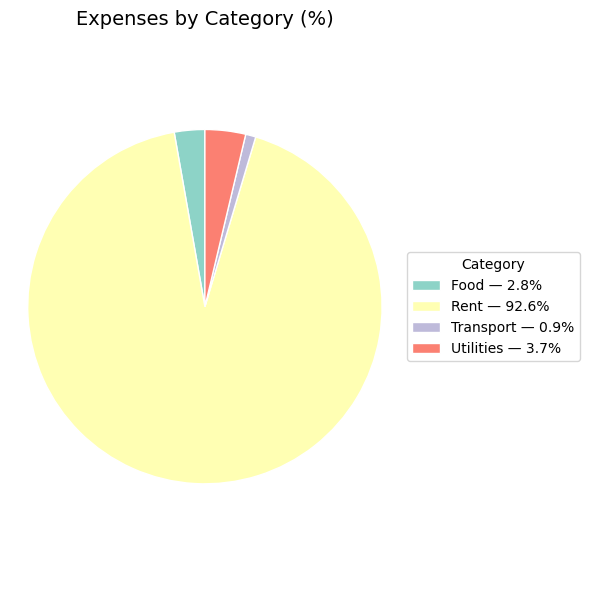

In [16]:
# Pie chart of spending by category
plt.figure(figsize=(6, 6))  # Set the figure size

# Create the pie chart WITHOUT labels or autopct on slices
wedges, texts = plt.pie(
    category_group['total_amount'],
    startangle=90,
    colors=plt.cm.Set3.colors[:len(category_group)],  # optional nice color set
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'}
)

# Calculate percentages manually
percentages = (category_group['total_amount'] / category_group['total_amount'].sum() * 100).round(1)

# Build legend labels as "Category - xx.x%"
legend_labels = [f"{cat} — {perc}%" for cat, perc in zip(category_group.index, percentages)]

# Add a title
plt.title('Expenses by Category (%)', fontsize=14)
plt.axis('equal')  # Keep the pie chart circular

# Place the legend outside the pie
plt.legend(
    wedges, legend_labels,
    title='Category',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.tight_layout()  # Fit everything nicely
plt.show()

In [10]:
# Filtering data by a specific date range
start_date = '2025-06-01'
end_date = '2025-06-30'
filtered_df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

In [11]:
# Print the filtered data to check expenses within the specified range
print(f"\nExpenses between {start_date} and {end_date}:")
print(filtered_df)


Expenses between 2025-06-01 and 2025-06-30:
Empty DataFrame
Columns: [Date, Category, Amount, Description]
Index: []


In [13]:
# Adding a new expense
# Creating a dictionary for a new expense entry
new_expense = {
    'Date': pd.Timestamp('2025-06-13'),   # Date of expense
    'Category': 'Food',                  # Category of expense
    'Amount': 200,                       # Amount spent
    'Description': 'Groceries'           # Description
}
# Append the new expense as a new row in the existing DataFrame
df = pd.concat([df, pd.DataFrame([new_expense])], ignore_index=True)
# Save the updated DataFrame back to the CSV file
df.to_csv('expenses.csv', index=False)
print("\nNew expense added successfully")


New expense added successfully


In [14]:
# Save the category summary report into a new CSV file
category_group.to_csv('summary_report.csv')
print("\nSummary report saved as summary_report.csv")


Summary report saved as summary_report.csv
